# Unit 1 Project
## **Group 2:** *Andrew Boehm, Ayssia Nicole Crockem, Avni Patel, Isabella Peterson, Kruthik Ravikanti, Ellie Kate Watson, Margaret Ailin Wei*
**What *is* an integrate and fire (I&F) neuron model?**

> Models the binary firing of a neuron based on whether or not an AP is fired. When the inputs reach a threshold, the neuron fires and the membrane potential is reset back to resting potential. Membrane potential increases linearly until it reaches threshold. Membrane potential does not decay over time.

**Benefits of the I&F model**
1. Computationally lightweight- information is the most simple, uses the fewest bits, least complex, most concise.
2. Captures the basic, essential features of neuronal behavior
3. Easy to analyze

**Limitations of the I&F model**
1. Does not account for leaky ion channels or voltage-gated ion channels
2. Very oversimplified spiking behavior, cannot reproduce more sophisticated behaviors like bursting, spike-frequency adaptation, or dendritic processing
3. Not biologically accurate, as it has an instantaneous reset after an action potential, relies on an external spike-triggering mechanism rather than realistic biophysical processes.

**Usefulness**
>Ideal for studies where biological accuracy is not required, such as ones where computational speed/efficiency is most important, like for theoretical, large-scale simulations.


**What *is* a leaky integrate and fire (LIF) neuron model?**
> The Leaky-Integrate and Fire model (LIF) is an expansion of the basic Integrate & Fire model (IF). It extends to include the 'leaky' ion channels that are in cell membranes and allow for a more natural decay of the membrane potential overtime. The inclusion of the leaky channels makes this model more biologically realistic.


**Benefits of the LIF model**
1. Natural decay of membrane potential is more biologically realistic.
2. Still more computationally lightweight than HH, uses fewer bits than HH but more than IF, moderate complexity, moderately concise. Therefore, may be useful for large-scale
3. Still easy to analyze

**Limitations of the LIF model**
1. Missing opening and closing of voltage-gated channels
2. Does not produce complex firing patterns like bursting
3. Cannot naturally produce action potentials based solely on intrinsic dynamics, still relying on an external spike-triggering mechanism rather than realistic biophysical processes like in I&F model.


**Usefulness**
>Ideal for large-scale studies where a compromise between computational efficiency and biological accuracy is needed.

**What *is* a (HH) neuron model?**
>The Hodgkin-Huxley model is a more complex and realistic version of the LIF and IF models. This model incorporates voltage-gated ion channels, such as sodium (Na+) and potassium (K+) channels, to make this the most accurate model representation of neurons.

**Benefits of the HH model**
1. Most sophisticated/biologically accurate
2. Can reproduce complex phenomena like refractory periods, ion channel gating, time constants, etc.
3. Can be extended to include more complex phenomena like spatial variations via the cable equation.

**Limitations of the HH model**
1. Assumes every area of the neuronal membrane has the same properties and that all ion channels behave identically.
2. Involves multiple nonlinear differential equations, making it computationally expensive and difficult to implement in large-scale network simulations.
3. Still simplifies processes like synaptic dynamics and modulatory effects.

**Usefulness**
>Ideal for studies where biological accuracy is required, such as ones focused on complex, individual neuron dynamics and specific action potential mechanisms.

**What *is* an open-loop simple neural network?**
1. Consists of an input, a feedforward controller, an actuator (does the output action), and a variable output. Information flows in one direction, as there is no feedback mechanism.

**Benefits of an open-loop simple neural network**
1. Has the potential to respond rapidly and accurately to an input if the controller is correctly calibrated based on learning from previous data.
2. Easy to analyze and debug, as the network acts deterministically for any given input.

**Limitations of an open-loop simple neural network**
1. May not be ideal for novel or unpredictable situations (i.e. responding to feedback).
2. No adaptation, learning, or memory of past states, lowering its complexitiy.

**Discussion: Information theory**
1. The IF model has the least number of bits because it is the very basic model of a single neuron which outputs a boolean output of fire or no fire (a perceptron).
2. The LIF model would have slightly more bits that IF because it is also taking into account leaky channels. This means that there are at least two inputs (membrane potential and leaky chanels) to generate an output.
3. The HH model would have more bits that both IF and LIF because it takes into account voltage gated ion channels along with leaky channels and membrane potential.
4. Lastly, the simple neural network would have the most bits because it takes inputs and processes them based on previous experience and by weights of the inputs to generate an output that can perform some action or give some information.

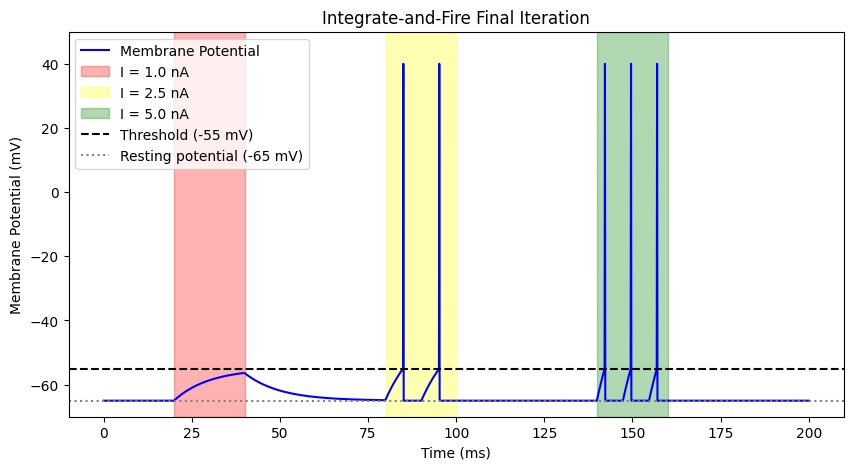

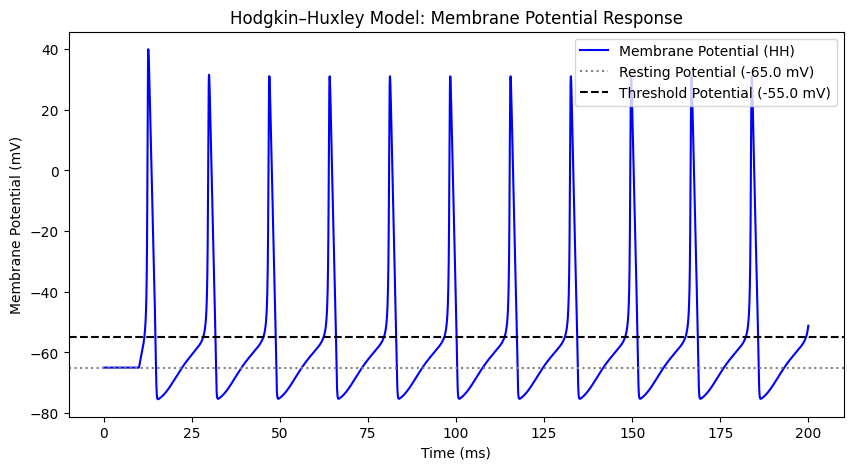

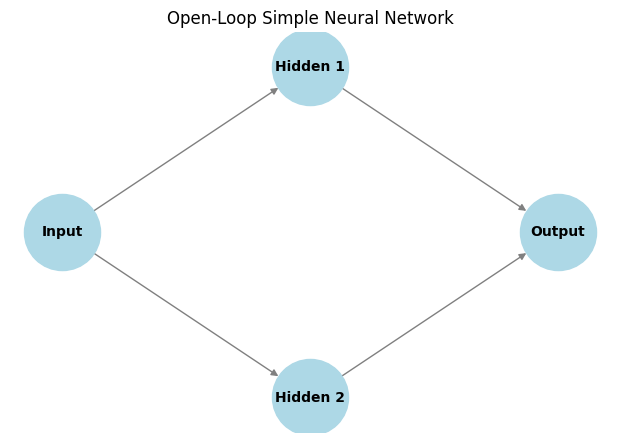

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###############################################
# Part 1: Integrate-and-Fire (I&F) Model Code
###############################################

## I&F Iteration 4 ##

# Simulation parameters
dt = 0.1  # Time step (ms)
T = 200   # Total simulation time (ms)
time = np.arange(0, T, dt)

# Neuron parameters
tau_m = 10  # Membrane time constant (ms)
R_m = 10    # Membrane resistance (MΩ)
V_rest = -65  # Resting potential (mV)
V_thresh = -55  # Threshold potential (mV)
V_spike = 40  # Spike peak (mV)
V_reset = -65  # Reset potential after spike (mV)
spike_duration = 1.5  # Duration of action potential (ms)
refractory_period = 5  # Refractory period after spike (ms)

def integrate_and_fire(I_inj_times, I_values, T=T, dt=dt):
    """Simulates an Integrate-and-Fire neuron with separate current injections."""
    V = np.full_like(time, V_rest)  # Initialize membrane potential
    spikes = []  # Store spike times
    refractory = 0  # Refractory countdown

    for t in range(1, len(time)):
        # Determine if a current is being injected
        I = 0
        for start, I_val in zip(I_inj_times, I_values):
            if start <= time[t] < start + 20:  # Each injection lasts 20ms
                I = I_val
                break  # Only one current at a time

        if refractory > 0:
            V[t] = V_reset  # Hold at reset potential during refractory period
            refractory -= dt
            continue

        # Compute voltage update
        dV = (-(V[t-1] - V_rest) + R_m * I) * (dt / tau_m)
        V[t] = V[t-1] + dV

        if V[t] >= V_thresh:  # Spike condition
            V[t] = V_spike  # Peak at +40mV
            spikes.append(time[t])  # Store spike time
            refractory = refractory_period  # Start refractory period

            # Ensure the spike lasts 1.5 ms
            spike_end = t + int(spike_duration / dt)
            if spike_end < len(time):
                V[spike_end] = V_reset  # Drop back to reset

    return V, spikes

# Define current injection times and amplitudes
I_inj_times = [20, 80, 140]  # ms (when current is injected)
I_values = [1.0, 2.5, 5.0]  # nA (different intensities)
colors = {1.0: 'red', 2.5: 'yellow', 5.0: 'green'}  # Define color mapping

# Run the model
V, spikes = integrate_and_fire(I_inj_times, I_values)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, V, label="Membrane Potential", color="b")

# Mark current injections with specified colors
for start, I in zip(I_inj_times, I_values):
    plt.axvspan(start, start + 20, color=colors[I], alpha=0.3, label=f"I = {I} nA")

# Add threshold and resting lines
plt.axhline(V_thresh, linestyle='--', color='black', label="Threshold (-55 mV)")
plt.axhline(V_rest, linestyle=':', color='gray', label="Resting potential (-65 mV)")

# Labels and legend
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate-and-Fire Final Iteration")
plt.legend()
plt.ylim(-70, 50)  # Adjust y-axis to show full spike
plt.show()


###############################################
# Part 2: Hodgkin–Huxley (HH) Model Code
###############################################

# HH simulation parameters
dt_HH = 0.01  # Time step (ms)
T_HH = 200     # Total simulation time (ms)
time_HH = np.arange(0, T_HH, dt_HH)

# HH model parameters
C_m  = 1.0      # Membrane capacitance (µF/cm²)
g_Na = 120.0    # Maximum sodium conductance (mS/cm²)
g_K  = 36.0     # Maximum potassium conductance (mS/cm²)
g_L  = 0.3      # Leak conductance (mS/cm²)
E_Na = 50.0     # Sodium reversal potential (mV)
E_K  = -77.0    # Potassium reversal potential (mV)
E_L  = -54.387  # Leak reversal potential (mV)

# Define resting and threshold potentials for plotting in HH
V_rest_HH = -65.0   # Resting potential (mV)
V_thresh_HH = -55.0  # Assumed threshold potential (mV)

# Rate functions (in ms⁻¹) for the gating variables
def alpha_n(V):
    if abs(V + 55) < 1e-6:
        return 0.1
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)

def alpha_m(V):
    if abs(V + 40) < 1e-6:
        return 1.0
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1 / (1 + np.exp(-(V + 35) / 10))

# Initialize state variables for the HH model
V_HH = np.empty_like(time_HH)
m_HH = np.empty_like(time_HH)
h_HH = np.empty_like(time_HH)
n_HH = np.empty_like(time_HH)

# Set initial conditions
V_HH[0] = V_rest_HH  # Start at resting potential
m_HH[0] = alpha_m(V_HH[0]) / (alpha_m(V_HH[0]) + beta_m(V_HH[0]))
h_HH[0] = alpha_h(V_HH[0]) / (alpha_h(V_HH[0]) + beta_h(V_HH[0]))
n_HH[0] = alpha_n(V_HH[0]) / (alpha_n(V_HH[0]) + beta_n(V_HH[0]))

# Define the external (injected) current for HH (µA/cm²)
I_HH = np.zeros_like(time_HH)
I_inj = 7.0  # Amplitude of injected current (µA/cm²)
# Inject current between 10 ms and 40 ms
I_HH[(time_HH >= 10) & (time_HH <= 200)] = I_inj

# Simulate the HH model using the Euler method
for t in range(1, len(time_HH)):
    # Update gating variables using Euler's method
    dm = dt_HH * (alpha_m(V_HH[t-1]) * (1 - m_HH[t-1]) - beta_m(V_HH[t-1]) * m_HH[t-1])
    dh = dt_HH * (alpha_h(V_HH[t-1]) * (1 - h_HH[t-1]) - beta_h(V_HH[t-1]) * h_HH[t-1])
    dn = dt_HH * (alpha_n(V_HH[t-1]) * (1 - n_HH[t-1]) - beta_n(V_HH[t-1]) * n_HH[t-1])
    m_HH[t] = m_HH[t-1] + dm
    h_HH[t] = h_HH[t-1] + dh
    n_HH[t] = n_HH[t-1] + dn

    # Compute ionic currents at the previous time step
    I_Na = g_Na * (m_HH[t-1] ** 3) * h_HH[t-1] * (V_HH[t-1] - E_Na)
    I_K  = g_K  * (n_HH[t-1] ** 4) * (V_HH[t-1] - E_K)
    I_L  = g_L  * (V_HH[t-1] - E_L)

    # Update membrane potential using the HH equation
    dV = dt_HH * (I_HH[t-1] - I_Na - I_K - I_L) / C_m
    V_HH[t] = V_HH[t-1] + dV

# Plot the HH model results with lines for resting and threshold potentials
plt.figure(figsize=(10, 5))
plt.plot(time_HH, V_HH, 'b', label='Membrane Potential (HH)')
plt.axhline(V_rest_HH, linestyle=':', color='gray',
            label=f"Resting Potential ({V_rest_HH} mV)")
plt.axhline(V_thresh_HH, linestyle='--', color='black',
            label=f"Threshold Potential ({V_thresh_HH} mV)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Hodgkin–Huxley Model: Membrane Potential Response")
plt.legend()
plt.show()
################################
# Part 3: Open Loop Simple Network
################################

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes representing neurons
neurons = ["Input", "Hidden 1", "Hidden 2", "Output"]
G.add_nodes_from(neurons)

# Add edges representing connections
edges = [("Input", "Hidden 1"), ("Input", "Hidden 2"),
         ("Hidden 1", "Output"), ("Hidden 2", "Output")]
G.add_edges_from(edges)

# Define positions for better visualization
pos = {"Input": (0, 1), "Hidden 1": (1, 2), "Hidden 2": (1, 0), "Output": (2, 1)}

# Draw the network
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold')
plt.title("Open-Loop Simple Neural Network")
plt.show()


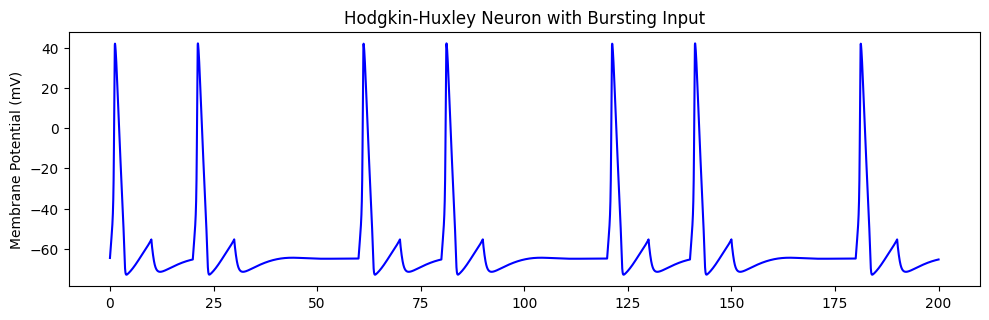

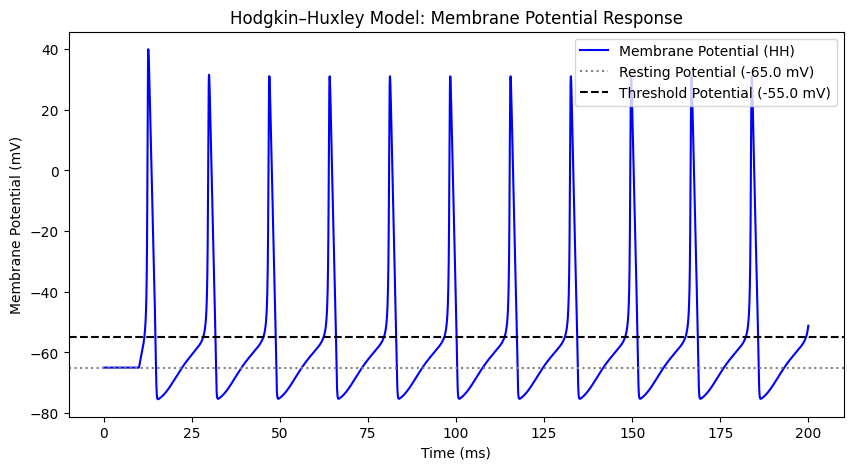

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
C_m = 1.0  # Membrane capacitance, uF/cm^2

# Maximum conductances (mS/cm^2)
g_Na = 120.0  # Sodium conductance
g_K = 36.0  # Potassium conductance
g_L = 0.3   # Leak conductance

# Reversal potentials (mV)
E_Na = 50.0   # Sodium reversal potential
E_K = -77.0   # Potassium reversal potential
E_L = -54.387  # Leak reversal potential

# Time parameters
t_max = 200.0  # Simulation time in ms
dt = 0.01     # Time step in ms
time = np.arange(0, t_max, dt)

# Bursting input parameters
burst_frequency = 50  # Hz, frequency of pulses within each burst
burst_duration = 30   # ms, duration of each burst
silent_period = 30    # ms, silence period between bursts
pulse_amplitude = 30  # uA/cm^2, current pulse amplitude

# Initialize variables
V = -65.0  # Initial membrane potential (mV)
n = 0.3177
m = 0.0529
h = 0.5961

V_trace = []
current_input = []

# Functions for gating variables and input current
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)

def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)

def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))

def bursting_input(t):
    cycle_duration = burst_duration + silent_period
    if (t % cycle_duration) < burst_duration:
        pulse_interval = 1000 / burst_frequency  # Interval between pulses in ms
        if (t % pulse_interval) < (pulse_interval / 2):
            return pulse_amplitude
    return 0.0

# Simulation loop
for t in time:
    # Calculate input current
    I_ext = bursting_input(t)
    current_input.append(I_ext)

    # Update gating variables
    dn = (alpha_n(V) * (1 - n)) - (beta_n(V) * n)
    dm = (alpha_m(V) * (1 - m)) - (beta_m(V) * m)
    dh = (alpha_h(V) * (1 - h)) - (beta_h(V) * h)

    n += dn * dt
    m += dm * dt
    h += dh * dt

    # Calculate currents
    I_Na = g_Na * (m ** 3) * h * (V - E_Na)
    I_K = g_K * (n ** 4) * (V - E_K)
    I_L = g_L * (V - E_L)

    # Update membrane potential using Euler's method
    dV = (I_ext - I_Na - I_K - I_L) / C_m
    V += dV * dt

    # Store membrane potential
    V_trace.append(V)

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, V_trace, color='b')
plt.title('Hodgkin-Huxley Neuron with Bursting Input')
plt.ylabel('Membrane Potential (mV)')

plt.tight_layout()
plt.show()

#####################
# Constant input
#####################

# HH simulation parameters
dt_HH = 0.01  # Time step (ms)
T_HH = 200     # Total simulation time (ms)
time_HH = np.arange(0, T_HH, dt_HH)

# HH model parameters
C_m  = 1.0      # Membrane capacitance (µF/cm²)
g_Na = 120.0    # Maximum sodium conductance (mS/cm²)
g_K  = 36.0     # Maximum potassium conductance (mS/cm²)
g_L  = 0.3      # Leak conductance (mS/cm²)
E_Na = 50.0     # Sodium reversal potential (mV)
E_K  = -77.0    # Potassium reversal potential (mV)
E_L  = -54.387  # Leak reversal potential (mV)

# Define resting and threshold potentials for plotting in HH
V_rest_HH = -65.0   # Resting potential (mV)
V_thresh_HH = -55.0  # Assumed threshold potential (mV)

# Rate functions (in ms⁻¹) for the gating variables
def alpha_n(V):
    if abs(V + 55) < 1e-6:
        return 0.1
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)

def alpha_m(V):
    if abs(V + 40) < 1e-6:
        return 1.0
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1 / (1 + np.exp(-(V + 35) / 10))

# Initialize state variables for the HH model
V_HH = np.empty_like(time_HH)
m_HH = np.empty_like(time_HH)
h_HH = np.empty_like(time_HH)
n_HH = np.empty_like(time_HH)

# Set initial conditions
V_HH[0] = V_rest_HH  # Start at resting potential
m_HH[0] = alpha_m(V_HH[0]) / (alpha_m(V_HH[0]) + beta_m(V_HH[0]))
h_HH[0] = alpha_h(V_HH[0]) / (alpha_h(V_HH[0]) + beta_h(V_HH[0]))
n_HH[0] = alpha_n(V_HH[0]) / (alpha_n(V_HH[0]) + beta_n(V_HH[0]))

# Define the external (injected) current for HH (µA/cm²)
I_HH = np.zeros_like(time_HH)
I_inj = 7.0  # Amplitude of injected current (µA/cm²)
# Inject current between 10 ms and 40 ms
I_HH[(time_HH >= 10) & (time_HH <= 200)] = I_inj

# Simulate the HH model using the Euler method
for t in range(1, len(time_HH)):
    # Update gating variables using Euler's method
    dm = dt_HH * (alpha_m(V_HH[t-1]) * (1 - m_HH[t-1]) - beta_m(V_HH[t-1]) * m_HH[t-1])
    dh = dt_HH * (alpha_h(V_HH[t-1]) * (1 - h_HH[t-1]) - beta_h(V_HH[t-1]) * h_HH[t-1])
    dn = dt_HH * (alpha_n(V_HH[t-1]) * (1 - n_HH[t-1]) - beta_n(V_HH[t-1]) * n_HH[t-1])
    m_HH[t] = m_HH[t-1] + dm
    h_HH[t] = h_HH[t-1] + dh
    n_HH[t] = n_HH[t-1] + dn

    # Compute ionic currents at the previous time step
    I_Na = g_Na * (m_HH[t-1] ** 3) * h_HH[t-1] * (V_HH[t-1] - E_Na)
    I_K  = g_K  * (n_HH[t-1] ** 4) * (V_HH[t-1] - E_K)
    I_L  = g_L  * (V_HH[t-1] - E_L)

    # Update membrane potential using the HH equation
    dV = dt_HH * (I_HH[t-1] - I_Na - I_K - I_L) / C_m
    V_HH[t] = V_HH[t-1] + dV

# Plot the HH model results with lines for resting and threshold potentials
plt.figure(figsize=(10, 5))
plt.plot(time_HH, V_HH, 'b', label='Membrane Potential (HH)')
plt.axhline(V_rest_HH, linestyle=':', color='gray',
            label=f"Resting Potential ({V_rest_HH} mV)")
plt.axhline(V_thresh_HH, linestyle='--', color='black',
            label=f"Threshold Potential ({V_thresh_HH} mV)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Hodgkin–Huxley Model: Membrane Potential Response")
plt.legend()
plt.show()

**Bursting Input vs. Constant Input**

* The bursting input changes the code from constant input by causing the neuron
to spike only during the bursting input. The constant input shows constant spikes while the bursting input shows patterns of spikes followed by time in between.

This type of input is useful in situations where central pattern generators may be necessary such as in the swimming phase of the swim or escape or heart beat examples.

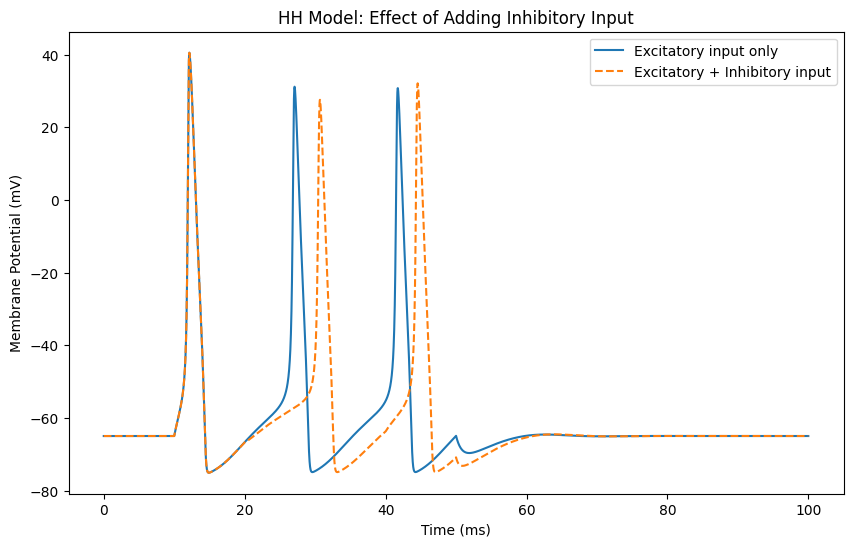

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.01              # time step (ms)
t = np.arange(0, 100, dt)  # simulation time from 0 to 100 ms
n = len(t)

# HH model parameters
Cm = 1.0       # membrane capacitance (uF/cm^2)
gNa = 120.0    # maximum sodium conductance (mS/cm^2)
gK = 36.0      # maximum potassium conductance (mS/cm^2)
gL = 0.3       # leak conductance (mS/cm^2)
ENa = 50.0     # sodium reversal potential (mV)
EK = -77.0     # potassium reversal potential (mV)
EL = -54.387   # leak reversal potential (mV)

# Functions for gating variable rate constants
def alpha_m(V):
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V):
    return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V):
    return 1.0 / (1 + np.exp(-(V + 35) / 10))
def alpha_n(V):
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)

# Initialize arrays for two conditions:
#   - V_exc: voltage with excitatory input only
#   - V_inh: voltage with both excitatory and inhibitory input
V_exc = np.empty(n)
V_inh = np.empty(n)
m_exc = np.empty(n)
h_exc = np.empty(n)
n_exc = np.empty(n)
m_inh = np.empty(n)
h_inh = np.empty(n)
n_inh = np.empty(n)

# Set initial conditions (resting state)
V0 = -65.0
V_exc[0] = V0
V_inh[0] = V0
m0 = alpha_m(V0) / (alpha_m(V0) + beta_m(V0))
h0 = alpha_h(V0) / (alpha_h(V0) + beta_h(V0))
n0 = alpha_n(V0) / (alpha_n(V0) + beta_n(V0))
m_exc[0] = m0; h_exc[0] = h0; n_exc[0] = n0
m_inh[0] = m0; h_inh[0] = h0; n_inh[0] = n0

# Define input currents:
I_inj = np.zeros(n)
# Excitatory current: step current from 10 ms to 50 ms (in uA/cm^2)
I_inj[(t >= 10) & (t < 50)] = 10.0

# Define inhibitory synaptic input (only for the second simulation):
# Here we model the inhibitory input as a conductance-based current
# with maximum conductance (g_inh_max) active between 20 and 40 ms.
g_inh = np.zeros(n)
g_inh_max = 0.1  # maximum inhibitory conductance (mS/cm^2)
E_inh = -80.0    # inhibitory reversal potential (mV)
g_inh[(t >= 20) & (t < 40)] = g_inh_max

# Simulate the HH equations using Euler integration
for i in range(n - 1):
    # --- Simulation 1: Excitatory input only ---
    V = V_exc[i]
    m = m_exc[i]
    h = h_exc[i]
    n_val = n_exc[i]
    # Compute ionic currents
    INa = gNa * m**3 * h * (V - ENa)
    IK = gK * n_val**4 * (V - EK)
    IL = gL * (V - EL)
    # Update membrane potential: dV/dt = (I_inj - (INa+IK+IL)) / Cm
    V_exc[i + 1] = V + dt * (I_inj[i] - (INa + IK + IL)) / Cm
    # Update gating variables
    m_exc[i + 1] = m + dt * (alpha_m(V) * (1 - m) - beta_m(V) * m)
    h_exc[i + 1] = h + dt * (alpha_h(V) * (1 - h) - beta_h(V) * h)
    n_exc[i + 1] = n_val + dt * (alpha_n(V) * (1 - n_val) - beta_n(V) * n_val)

    # --- Simulation 2: Excitatory + Inhibitory input ---
    V = V_inh[i]
    m = m_inh[i]
    h = h_inh[i]
    n_val = n_inh[i]
    # Compute ionic currents
    INa = gNa * m**3 * h * (V - ENa)
    IK = gK * n_val**4 * (V - EK)
    IL = gL * (V - EL)
    # Inhibitory synaptic current: I_inh = g_inh*(V - E_inh)
    I_inh_current = g_inh[i] * (V - E_inh)
    # Update membrane potential with the inhibitory term included:
    V_inh[i + 1] = V + dt * (I_inj[i] - (INa + IK + IL) - I_inh_current) / Cm
    # Update gating variables
    m_inh[i + 1] = m + dt * (alpha_m(V) * (1 - m) - beta_m(V) * m)
    h_inh[i + 1] = h + dt * (alpha_h(V) * (1 - h) - beta_h(V) * h)
    n_inh[i + 1] = n_val + dt * (alpha_n(V) * (1 - n_val) - beta_n(V) * n_val)

# Plot the results:
plt.figure(figsize=(10, 6))
plt.plot(t, V_exc, label='Excitatory input only')
plt.plot(t, V_inh, label='Excitatory + Inhibitory input', linestyle='--')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('HH Model: Effect of Adding Inhibitory Input')
plt.legend()
plt.show()


**Inhibitory Effect on a Constant Input**

* The inhibitory input was added to a neuron being excited by a constant input. This caused a delay in the spikes of the neuron as the inhibitory input makes it more difficult for the neuron to reach threshold and achieve an AP.

This type of input is useful in situations where there may need to be an artificial bursting effect by periodic inhibition as well as in situations where some counterbalance to excitatory inputs is needed.

## HW Questions

### Discussion
1. What changes had to be made to update the model and why?
2. How did you and/or ChatGPT implement the changes? As part of your answer provide in "" the new parts of the code that produce this change.
3. Define 'bits' and Shannon's entropy with relation to information theory. Which model contains the most bits? Which model has the highest Shannon's entropy? Explain your answer.

**Answer**
1. The update from the Integrate-and-Fire (I&F) model to the Hodgkin-Huxley (HH) model was essential in order to achieve a more biologically accurate representation of neuronal activity. We know that the I&F model is a simplified threshold-based approximation while the HH model also considers voltage-dependent ion channels such as sodium, potassium, and leaky currents. It also incorporates variables like m, h, and n to describe ion channel dynamics. Through these changes, we get a more realistic spike generation, subthreshold oscillations, and even refractory periods. Hence, the HH model is perfect for detailed neural simulations.
2. The I&F model only tracks membrane potential, while the HH model introduces gating variables (m,h,n) to describe the probability of channel states. We added code to implement the alpha and beta functions for each variable.
"def alpha_n(V):
    if abs(V + 55) < 1e-6:
        return 0.1
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)

def alpha_m(V):
    if abs(V + 40) < 1e-6:
        return 1.0
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1 / (1 + np.exp(-(V + 35) / 10))"

Additionally, the I&F model resets voltage to a fixed value when reaching a threshold. The HH model instead calculates sodium, potassium, and leak current dynamically.
"I_Na = g_Na * (m_HH[t-1] ** 3) * h_HH[t-1] * (V_HH[t-1] - E_Na)
I_K  = g_K  * (n_HH[t-1] ** 4) * (V_HH[t-1] - E_K)
I_L  = g_L  * (V_HH[t-1] - E_L)"

3. According to information theory, a bit is the fundamental unit of information where one bit can reduce uncertainty by a factor of 2 (binary). Additionally, Shannon's entropy measures the average amount of information in a system, also known as unpredictability. The HH model has the most bits and the highest Shannon's entropy. HH model has more bits since it has more state variables (m, h, n) and models continuous dynamics. Furthermore, HH has a higher Shannon's entropy due to the probabilistic nature of ion channel gating, continuous membrane potential evolution, and the presence of subthreshold oscillations and variable spike timings. On the other hand, the I&F model has simple binary making the output more predictable and lowering entropy.

### Reflection
1. Did you encounter any problems? How did you overcome them? Or are you still unable to make it work?


**Answer**
1. No, we did not encounter any problems. For collaboration, we are using Google Colab which serves as a code editor where multiple people can work together. Upon talking to the TA, we discovered this was an acceptable way to do our assignments. There are minimal challenges, and we are able to make it work well. Also, we are housing these notebooks on github for easy access.

# **Topic Expansion** - Coincidence Detection for Sound

## Introduction

Coincidence detection is a fundamental neural mechanism that enables organisms to perceive spatial information about auditory stimuli based on the *timing* of sound waves arriving at each ear. When sound arrives at the left and right ear at different times, the auditory neurons fire at offset times. The signals travel along neural pathways called ***delay lines***, which have equivalent AP conduction speeds. Each auditory neuron synapses to multiple postsynaptic cells, which require excitatory input from both the left and the right auditory neuron to fire. Therefore, the signal from the ear *closer* to the sound will fire first, and travel further along the delay line before the signal from the other ear fires. As such, the postsynaptic neuron that fires will be *further* from the actual sound, as seen in the diagram below.

![Coincidence Detection Diagram](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.researchgate.net%2Fprofile%2FAndre-Van-Schaik%2Fpublication%2F49677948%2Ffigure%2Ffig2%2FAS%3A213372344770566%401427883339736%2FAn-illustration-of-Jeffress-model-Each-coincidence-detector-responses-best-to-a.png&f=1&nofb=1&ipt=51562e6b1f07c67bdece6bb3cd68cf2d48dec614dc94d84672730a70478f55c9&ipo=images)

These images above and below depict the Jeffress model, our classical model for coincidence detection. In short, coincidence detection in hearing allows for localization of sound in the environment, and when applied over time, allows an organism to perceive movement and direction of the sound.

![2nd Coincidence Detection Diagram](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.acousticslab.org%2FRECA220%2FPMFiles%2FPMImages%2FJeffress1.jpg&f=1&nofb=1&ipt=8787de16cb247d6ce109fd0d3d93ae824b9d2e525ed02810152facc5b53e66c3&ipo=images)


---


## Neural Mechanisms

The Jeffress model explains that coincidence detection primarily occurs in the auditory brainstem, particularly in the medial superior olive (MSO) in mammals and the nucleus laminaris (NL) in birds (1). These structures contain neurons specialized in detecting *interaural time differences* (ITDs), which are the slight delays in sound arrival between the two ears, as mentioned earlier. These postsnaptic neurons in the MSO and NL function as computational elements that fire maximally when inputs from both ears arrive simultaneously, allowing for precise localization of sound sources.

In addition to what we learned in class, delay lines project from the ventral cochlear nucleus (VCN) to the MSO, rather than directly from the cochlea (1). There are contralateral and ipsilateral delay line neurons from each VCN, indicating that the single delay line neuron from each ear is a major simplification (1). This also means that there are multiple nuclei that process sound timing information, such as a VCN, MSO, lateral nucleus of the trapezoid body (LNTB), and medial nucleus of the trapezoid body (MNTB) in each hemisphere of the brain. Diagram C on the figure below shows the sound localization pathway in a gerbel, representative of mammalian structures (1).

![Ispi and Contralateral Delay Lines](https://cdn.ncbi.nlm.nih.gov/pmc/blobs/2566/3192259/5fc5357e6217/nihms305116f1.jpg)

Key components involved in coincidence detection include:

*  **Delay Lines**: Axonal pathways that systematically introduce temporal delays,
ensuring that signals from different ears arrive at MSO coincidence detector neurons at the same time.

*  **Phase Locking**: Auditory nerve fibers' ability to fire action potentials in sync with particular phases of a sound wave, enhancing temporal accuracy.

*  **Excitatory and Inhibitory Inputs**: Balanced excitatory and inhibitory inputs fine-tune the sensitivity and response timing of coincidence detector neurons.


---


## Relevance to Sound Localization
Coincidence detection is essential for sound localization, particularly for low-frequency sounds where ITDs are most effective. Animals rely on this mechanism to detect and respond to auditory stimuli, such as locating a predator, a moving vehicle, or a speaker in a noisy environment. In higher-frequency sounds, interaural level differences (ILDs) become more significant, and other auditory processing mechanisms are involved.


---


## Further Reading & References

1. Ashida, G., & Carr, C. E. (2011). Sound localization: Jeffress and beyond. Current opinion in neurobiology, 21(5), 745–751. https://doi.org/10.1016/j.conb.2011.05.008

2. Chen, Y., Zhang, H., Wang, H., Yu, L., & Chen, Y. (2013). The role of coincidence-detector neurons in the reliability and precision of subthreshold signal detection in noise. PloS one, 8(2), e56822. https://doi.org/10.1371/journal.pone.0056822


**Code Iterations**

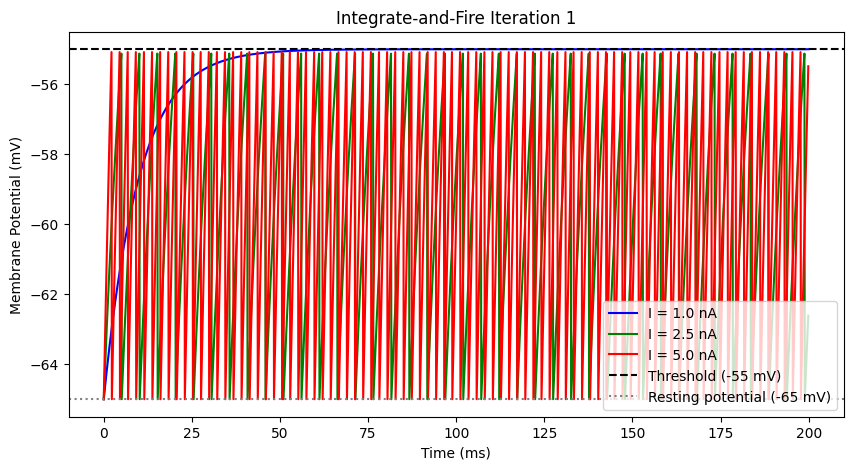

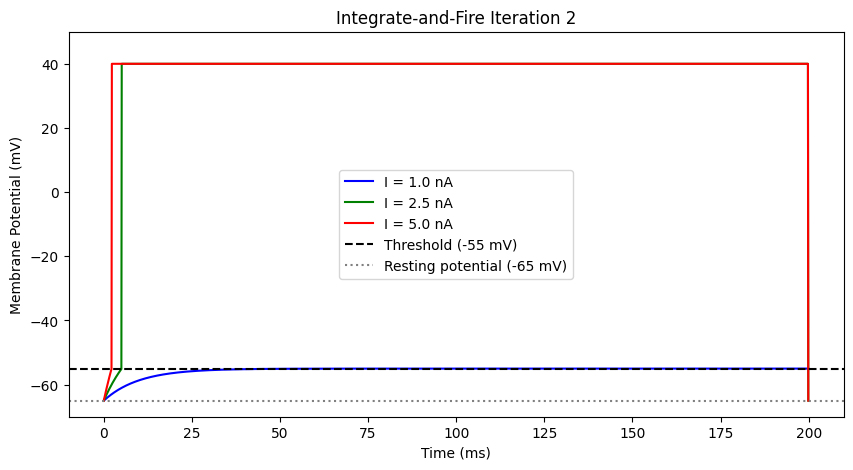

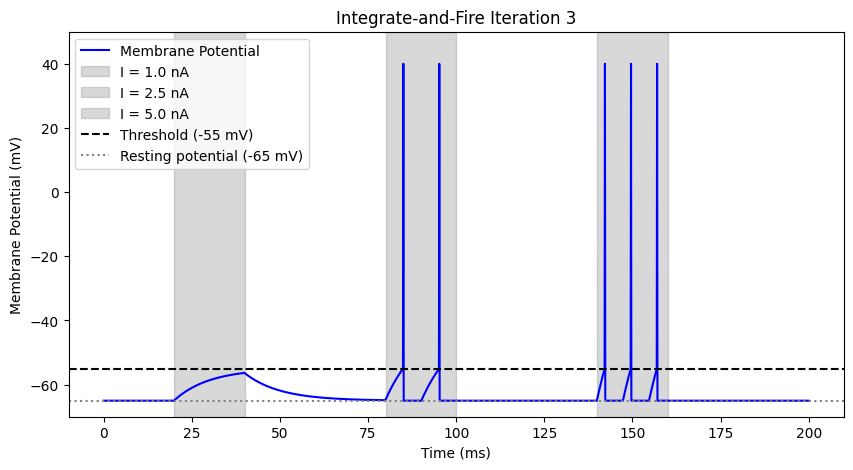

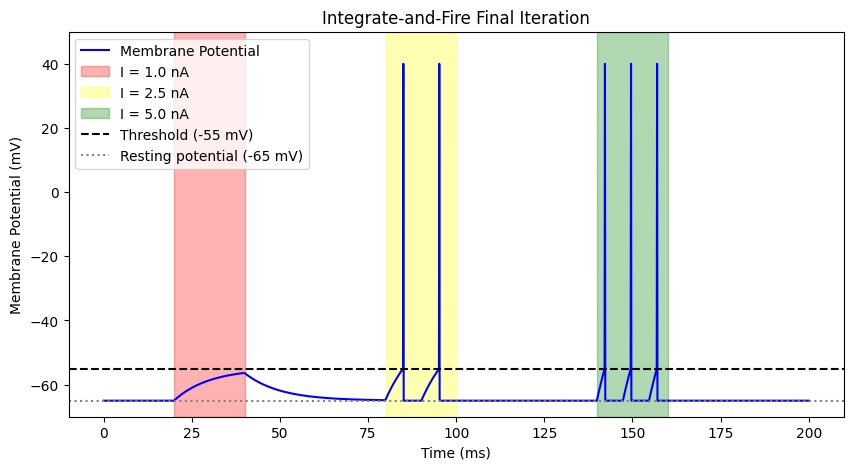

In [ ]:
## I&F Iteration 1 ##
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # Time step (ms)
T = 200   # Total simulation time (ms)
time = np.arange(0, T, dt)

# Neuron parameters
tau_m = 10  # Membrane time constant (ms)
R_m = 10    # Membrane resistance (MΩ)
V_rest = -65  # Resting potential (mV)
V_thresh = -55  # Firing threshold (mV)
V_reset = -65  # Reset potential after spike (mV)

def integrate_and_fire(I, T=T, dt=dt):
    """Simulates an Integrate-and-Fire neuron given input current I."""
    V = np.full_like(time, V_rest)  # Membrane potential initialization
    spikes = []  # To store spike times

    for t in range(1, len(time)):
        dV = (-(V[t-1] - V_rest) + R_m * I) * (dt / tau_m)
        V[t] = V[t-1] + dV

        if V[t] >= V_thresh:  # Spike condition
            V[t] = V_reset
            spikes.append(time[t])  # Store spike time

    return V, spikes

# Different input currents
currents = [1.0, 2.5, 5.0]  # nA (arbitrary units)
colors = ['b', 'g', 'r']

plt.figure(figsize=(10, 5))

for I, color in zip(currents, colors):
    V, spikes = integrate_and_fire(I)
    plt.plot(time, V, label=f'I = {I} nA', color=color)

# Add labels and legend
plt.axhline(V_thresh, linestyle='--', color='black', label="Threshold (-55 mV)")
plt.axhline(V_rest, linestyle=':', color='gray', label="Resting potential (-65 mV)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate-and-Fire Iteration 1")
plt.legend()
plt.show()


## I&F Iteration 2 ##
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # Time step (ms)
T = 200   # Total simulation time (ms)
time = np.arange(0, T, dt)

# Neuron parameters
tau_m = 10  # Membrane time constant (ms)
R_m = 10    # Membrane resistance (MΩ)
V_rest = -65  # Resting potential (mV)
V_thresh = -55  # Firing threshold (mV)
V_spike = 40  # Spike peak (mV)
V_reset = -65  # Reset potential after spike (mV)

def integrate_and_fire(I, T=T, dt=dt):
    """Simulates an Integrate-and-Fire neuron given input current I."""
    V = np.full_like(time, V_rest)  # Membrane potential initialization
    spikes = []  # To store spike times

    for t in range(1, len(time)):
        dV = (-(V[t-1] - V_rest) + R_m * I) * (dt / tau_m)
        V[t] = V[t-1] + dV

        if V[t] >= V_thresh:  # Spike condition
            V[t] = V_spike  # Peak at +40mV
            spikes.append(time[t])
            V[t+1 if t+1 < len(time) else t] = V_reset  # Reset on next step

    return V, spikes

# Different input currents
currents = [1.0, 2.5, 5.0]  # nA
colors = ['b', 'g', 'r']

plt.figure(figsize=(10, 5))

for I, color in zip(currents, colors):
    V, spikes = integrate_and_fire(I)
    plt.plot(time, V, label=f'I = {I} nA', color=color)

# Add labels and legend
plt.axhline(V_thresh, linestyle='--', color='black', label="Threshold (-55 mV)")
plt.axhline(V_rest, linestyle=':', color='gray', label="Resting potential (-65 mV)")
plt.ylim(-70, 50)  # Adjust y-axis to include spikes at +40 mV
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate-and-Fire Iteration 2")
plt.legend()
plt.show()


## I&F Iteration 3 ##
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # Time step (ms)
T = 200   # Total simulation time (ms)
time = np.arange(0, T, dt)

# Neuron parameters
tau_m = 10  # Membrane time constant (ms)
R_m = 10    # Membrane resistance (MΩ)
V_rest = -65  # Resting potential (mV)
V_thresh = -55  # Threshold potential (mV)
V_spike = 40  # Spike peak (mV)
V_reset = -65  # Reset potential after spike (mV)
spike_duration = 1.5  # Duration of action potential (ms)
refractory_period = 5  # Refractory period after spike (ms)

def integrate_and_fire(I_inj_times, I_values, T=T, dt=dt):
    """Simulates an Integrate-and-Fire neuron with separate current injections."""
    V = np.full_like(time, V_rest)  # Initialize membrane potential
    spikes = []  # Store spike times
    refractory = 0  # Refractory countdown

    for t in range(1, len(time)):
        # Determine if a current is being injected
        I = 0
        for start, I_val in zip(I_inj_times, I_values):
            if start <= time[t] < start + 20:  # Each injection lasts 20ms
                I = I_val
                break  # Only one current at a time

        if refractory > 0:
            V[t] = V_reset  # Hold at reset potential during refractory period
            refractory -= dt
            continue

        # Compute voltage update
        dV = (-(V[t-1] - V_rest) + R_m * I) * (dt / tau_m)
        V[t] = V[t-1] + dV

        if V[t] >= V_thresh:  # Spike condition
            V[t] = V_spike  # Peak at +40mV
            spikes.append(time[t])  # Store spike time
            refractory = refractory_period  # Start refractory period

            # Ensure the spike lasts 1.5 ms
            spike_end = t + int(spike_duration / dt)
            if spike_end < len(time):
                V[spike_end] = V_reset  # Drop back to reset

    return V, spikes

# Define current injection times and amplitudes
I_inj_times = [20, 80, 140]  # ms (when current is injected)
I_values = [1.0, 2.5, 5.0]  # nA (different intensities)

# Run the model
V, spikes = integrate_and_fire(I_inj_times, I_values)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, V, label="Membrane Potential", color="b")

# Mark current injections
for start, I in zip(I_inj_times, I_values):
    plt.axvspan(start, start + 20, color='gray', alpha=0.3, label=f"I = {I} nA")

# Add threshold and resting lines
plt.axhline(V_thresh, linestyle='--', color='black', label="Threshold (-55 mV)")
plt.axhline(V_rest, linestyle=':', color='gray', label="Resting potential (-65 mV)")

# Labels and legend
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate-and-Fire Iteration 3")
plt.legend()
plt.ylim(-70, 50)  # Adjust y-axis to show full spike
plt.show()




## I&F Iteration 4 ##
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # Time step (ms)
T = 200   # Total simulation time (ms)
time = np.arange(0, T, dt)

# Neuron parameters
tau_m = 10  # Membrane time constant (ms)
R_m = 10    # Membrane resistance (MΩ)
V_rest = -65  # Resting potential (mV)
V_thresh = -55  # Threshold potential (mV)
V_spike = 40  # Spike peak (mV)
V_reset = -65  # Reset potential after spike (mV)
spike_duration = 1.5  # Duration of action potential (ms)
refractory_period = 5  # Refractory period after spike (ms)

def integrate_and_fire(I_inj_times, I_values, T=T, dt=dt):
    """Simulates an Integrate-and-Fire neuron with separate current injections."""
    V = np.full_like(time, V_rest)  # Initialize membrane potential
    spikes = []  # Store spike times
    refractory = 0  # Refractory countdown

    for t in range(1, len(time)):
        # Determine if a current is being injected
        I = 0
        for start, I_val in zip(I_inj_times, I_values):
            if start <= time[t] < start + 20:  # Each injection lasts 20ms
                I = I_val
                break  # Only one current at a time

        if refractory > 0:
            V[t] = V_reset  # Hold at reset potential during refractory period
            refractory -= dt
            continue

        # Compute voltage update
        dV = (-(V[t-1] - V_rest) + R_m * I) * (dt / tau_m)
        V[t] = V[t-1] + dV

        if V[t] >= V_thresh:  # Spike condition
            V[t] = V_spike  # Peak at +40mV
            spikes.append(time[t])  # Store spike time
            refractory = refractory_period  # Start refractory period

            # Ensure the spike lasts 1.5 ms
            spike_end = t + int(spike_duration / dt)
            if spike_end < len(time):
                V[spike_end] = V_reset  # Drop back to reset

    return V, spikes

# Define current injection times and amplitudes
I_inj_times = [20, 80, 140]  # ms (when current is injected)
I_values = [1.0, 2.5, 5.0]  # nA (different intensities)
colors = {1.0: 'red', 2.5: 'yellow', 5.0: 'green'}  # Define color mapping

# Run the model
V, spikes = integrate_and_fire(I_inj_times, I_values)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, V, label="Membrane Potential", color="b")

# Mark current injections with specified colors
for start, I in zip(I_inj_times, I_values):
    plt.axvspan(start, start + 20, color=colors[I], alpha=0.3, label=f"I = {I} nA")

# Add threshold and resting lines
plt.axhline(V_thresh, linestyle='--', color='black', label="Threshold (-55 mV)")
plt.axhline(V_rest, linestyle=':', color='gray', label="Resting potential (-65 mV)")

# Labels and legend
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate-and-Fire Final Iteration")
plt.legend()
plt.ylim(-70, 50)  # Adjust y-axis to show full spike
plt.show()


# **Updating I&F model**
